In [1]:
# importujeme potrebné knižnice, tento odstavec by mal byť spustený ako prvý predtým ako sa budú používať
# importované objekty pd, np, plt a sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()

### Úloha 6.1

1. Do premennej `data_2017` načítajte dáta za rok 2017 zo súboru `2017.csv`.
2. Odstráňte nepotrebné stĺpce `WhiskerHigh` a `WhiskerLow`.
3. Pridajte stĺpec `Year` a nastavte jeho hodnotu na 2017 pre všetky riadky.
4. Zobrazte prvý riadok tabuľky.

In [3]:
data_2017 = pd.read_csv("../data/2017.csv")
data_2017.drop(columns=["WhiskerHigh", "WhiskerLow"], inplace=True)
data_2017["Year"] = 2017
data_2017.head(1)

,Country,Region,Rank,Score,GDP,Family,Health,Freedom,Generosity,Trust,Dystopia,Year
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017


### Úloha 6.2

1. Načítajte dáta z dátovej množiny Iris (súbor `../data/iris.csv`) do premennej `iris`.
2. Vypočítajte základné štatistiky pre číselné atribúty.
3. Pre nominálny atribút `species` zobrazte rôzne hodnoty a ich početnosti.
4. Zistite, či dátová množina obsahuje chýbajúce hodnoty.

In [2]:
iris = pd.read_csv("../data/iris.csv")
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
iris["species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

### Úloha 6.3

Zobrazte graf _pair plot_ pre číselné atribúty. Viete z priebehu určiť, ktoré atribúty sú najviac korelované?

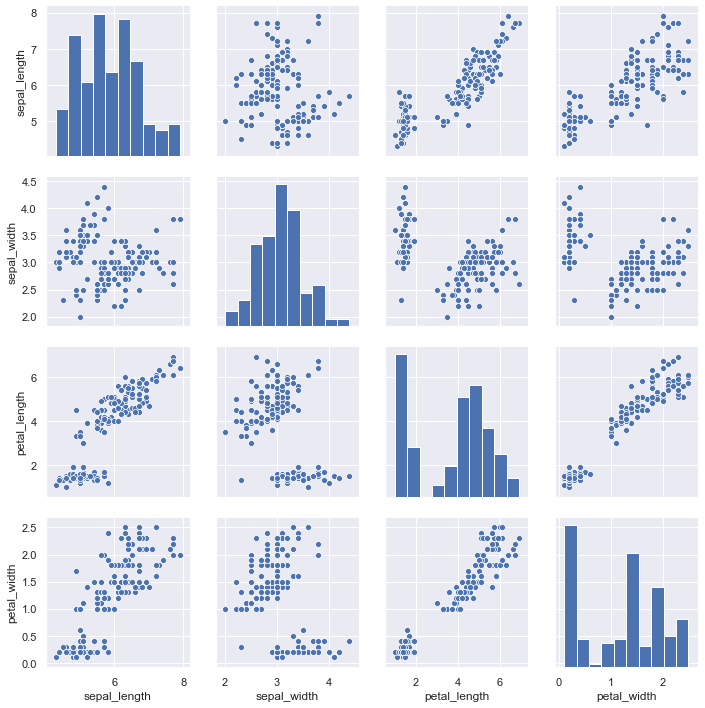

In [4]:
p = sns.pairplot(iris)

Najviac sú korelované `petal_length` a `petal_width`, pretože su najviac lineárne závislé.

### Úloha 6.4

Vypočítajte korelačnú maticu a zobrazte ju pomocou teplotnej mapy. Určite, ktoré dva atribúty sú najviac a najmenej korelované a zobrazte ich X-Y priebeh spolu s regresnou priamkou.

In [5]:
corr_table = iris.corr()
corr_table

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


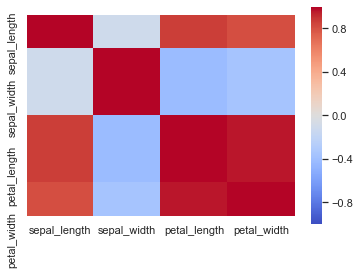

In [6]:
p = sns.heatmap(corr_table,
                xticklabels=corr_table.columns, yticklabels=corr_table.columns, # označíme osy názvami stĺpcov
                vmin=-1, vmax=1, # nastavíme minimálnu a maximálnu hodnotu pre farebnú paletu
                cmap='coolwarm', # zmeníme prednastavenú paletu farieb 
                square=True)     # zobrazia sa štvorcové polia

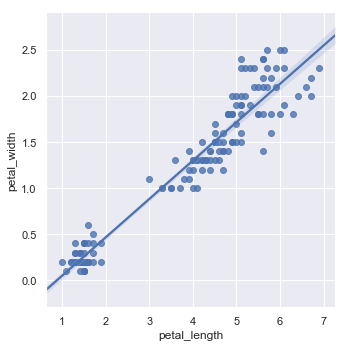

In [44]:
# najviac korelované atribúty
p = sns.lmplot(data=data, x='petal_length', y='petal_width', fit_reg=True) 

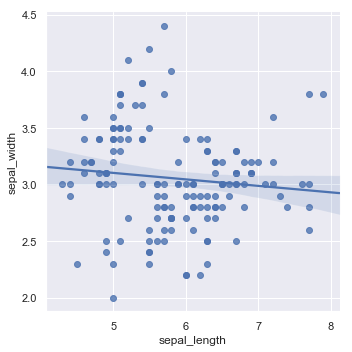

In [6]:
# najmenej korelované atribúty
p = sns.lmplot(data=data, x='sepal_length', y='sepal_width', fit_reg=True) 

### Úloha 6.5

Pomocou kontingenčnej tabuľky vypočítajte priemernú hodnotu a štandardnú odchýlku pre atribúty `sepal_length` a `sepal_width` zoskupené podľa atribútu `species`.

In [8]:
pd.pivot_table(iris, index="species", values=["sepal_length", "sepal_width"], aggfunc=["mean", "std"])

mean                      std            
           sepal_length sepal_width sepal_length sepal_width
species                                                     
setosa            5.006       3.418     0.352490    0.381024
versicolor        5.936       2.770     0.516171    0.313798
virginica         6.588       2.974     0.635880    0.322497

### Úloha 6.6

1. Odfiltrujte z dátovej množiny iba riadky (príklady) patriace do triedy `virginica`.
2. Z odfiltrovaných riadkov vytvorte tabuľku s atribútmi `sepal_ratio = sepal_length / sepal_width` a `petal_ratio = petal_length / petal_width`.
3. Zobrazte X-Y závislosť medzi `sepal_ratio` a `petal_ratio` a vypočítajte korelačný koeficient medzi nimi.

In [14]:
# odfiltrujeme príklady z triedy virginica
filtered = data.query("species == 'virginica'")

# pomocou metódy eval si vypočítame nové atribúty sepal_ratio a petal_ratio
sepal_ratio = filtered.eval("sepal_length / sepal_width")
petal_ratio = filtered.eval("petal_length / petal_width")

virginica_data = pd.DataFrame() # vytvoríme si nový prázdny dátový rámec
virginica_data["sepal_ratio"] = sepal_ratio # pridáme vypočítame atribúty pod názvami sepal_ratio
virginica_data["petal_ratio"] = petal_ratio # a petal_ratio

virginica_data.head() # zobrazíme prvé záznamy

,sepal_ratio,petal_ratio
100,1.909091,2.400000
101,2.148148,2.684211
102,2.366667,2.809524
103,2.172414,3.111111
104,2.166667,2.636364
